In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load dataset
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Set the seed for reproducibility
np.random.seed(42)

In [4]:
# Take a random sample of 25 observations
sample = df.sample(n=25, random_state=42)

Steps to slove the question

* **Bootstrap Sampling:** Create 500 bootstrap samples (with replacement) from the population, each consisting of 150 observations.

* **Calculate Statistics for Each Bootstrap Sample:** For each sample, calculate the mean, standard deviation, and 98th percentile of BloodPressure.

* **Calculate the Average Statistics Across Bootstrap Samples:** Compute the average mean, standard deviation, and percentile from the 500 bootstrap samples.

* **Compare with Population Statistics:** Calculate the same statistics for the entire population and create charts for comparison.

* **Report Findings:** Analyze and report the findings.

## **Bootstrap Sampling and Calculation**

In [15]:
import numpy as np
import pandas as pd

# Assuming df is your DataFrame containing the 'BloodPressure' column

# Number of bootstrap samples and size of each sample
n_bootstrap_samples = 500
sample_size = 150

# Arrays to store the statistics and samples from each bootstrap sample
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []
bootstrap_samples = []

# Bootstrap sampling and calculation of statistics
for _ in range(n_bootstrap_samples):
    # Create a bootstrap sample with replacement
    bootstrap_sample = df.sample(n=sample_size, replace=True)

    # Calculate statistics for the bootstrap sample
    mean_bp = bootstrap_sample['BloodPressure'].mean()
    std_bp = bootstrap_sample['BloodPressure'].std()
    percentile_98_bp = np.percentile(bootstrap_sample['BloodPressure'], 98)

    # Store the calculated statistics
    bootstrap_means.append(mean_bp)
    bootstrap_stds.append(std_bp)
    bootstrap_percentiles.append(percentile_98_bp)

    # Store the bootstrap sample
    bootstrap_samples.append(bootstrap_sample)

# Calculate the average statistics across all bootstrap samples
avg_mean_bp = np.mean(bootstrap_means)
avg_std_bp = np.mean(bootstrap_stds)
avg_percentile_98_bp = np.mean(bootstrap_percentiles)

# Calculate the population statistics for BloodPressure
population_mean_bp = df['BloodPressure'].mean()
population_std_bp = df['BloodPressure'].std()
population_percentile_98_bp = np.percentile(df['BloodPressure'], 98)

# Print the results
print("\033[1mMetrics of Blood Pressure of Sample Data\033[0m")
print("Average Mean BloodPressure:", avg_mean_bp)
print("Average Standard Deviation of BloodPressure:", avg_std_bp)
print("Average 98th Percentile of BloodPressure:", avg_percentile_98_bp)
print("==================================================================")
print("\033[1mMetrics of Blood Pressure for population data\033[0m")
print("Population Mean BloodPressure:", population_mean_bp)
print("Population Standard Deviation of BloodPressure:", population_std_bp)
print("Population 98th Percentile of BloodPressure:", population_percentile_98_bp)
print("==================================================================")
print("\033[1mTop 5 samples of Bootstrap Dataset\033[0m")
print(bootstrap_samples[0].head())  # Display the first bootstrap sample

# Bootstrap samples to csv files (will be displayed in the sidebar of google colab)
for i, sample in enumerate(bootstrap_samples):
    sample.to_csv(f'bootstrap_sample_{i+1}.csv', index=False)


Metrics of Blood Pressure of Sample Data
Average Mean BloodPressure: 69.04009333333332
Average Standard Deviation of BloodPressure: 19.259768652743237
Average 98th Percentile of BloodPressure: 98.23360000000004
Metrics of Blood Pressure for population data
Population Mean BloodPressure: 69.10546875
Population Standard Deviation of BloodPressure: 19.355807170644777
Population 98th Percentile of BloodPressure: 99.31999999999994
Top 5 samples of Bootstrap Dataset
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
736            0      126             86             27      120  27.4   
570            3       78             70              0        0  32.5   
701            6      125             78             31        0  27.6   
260            3      191             68             15      130  30.9   
275            2      100             70             52       57  40.5   

     DiabetesPedigreeFunction  Age  Outcome  
736                     0.515   21        0 

In [10]:
# Number of bootstrap samples and size of each sample
n_bootstrap_samples = 500
sample_size = 150

# Arrays to store the statistics from each bootstrap sample
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []

# Bootstrap sampling and calculation of statistics
for _ in range(n_bootstrap_samples):
    # Create a bootstrap sample with replacement
    bootstrap_sample = df.sample(n=sample_size, replace=True)

    # Calculate statistics for the bootstrap sample
    mean_bp = bootstrap_sample['BloodPressure'].mean()
    std_bp = bootstrap_sample['BloodPressure'].std()
    percentile_98_bp = np.percentile(bootstrap_sample['BloodPressure'], 98)

    # Store the calculated statistics
    bootstrap_means.append(mean_bp)
    bootstrap_stds.append(std_bp)
    bootstrap_percentiles.append(percentile_98_bp)

# Calculate the average statistics across all bootstrap samples
avg_mean_bp = np.mean(bootstrap_means)
avg_std_bp = np.mean(bootstrap_stds)
avg_percentile_98_bp = np.mean(bootstrap_percentiles)

# Calculate the population statistics for BloodPressure
population_mean_bp = df['BloodPressure'].mean()
population_std_bp = df['BloodPressure'].std()
population_percentile_98_bp = np.percentile(df['BloodPressure'], 98)

# Print the results
print("\033[1mMetrics of Blood Pressure of Sample Data\033[0m")
print("Average Mean BloodPressure:", avg_mean_bp)
print("Average Standard Deviation of BloodPressure:", avg_std_bp)
print("Average 98th Percentile of BloodPressure:", avg_percentile_98_bp)
print("==================================================================")
print("\033[1mMetrics of Blood Pressure for population data\033[0m")
print("Population Mean BloodPressure:", population_mean_bp)
print("Population Standard Deviation of BloodPressure:", population_std_bp)
print("Population 98th Percentile of BloodPressure:", population_percentile_98_bp)
print("==================================================================")
print("\033[1mTop 5 samples of Bootstrap Dataset\033[0m")
print(bootstrap_sample.shape)
bootstrap_sample.head()

Metrics of Blood Pressure of Sample Data
Average Mean BloodPressure: 69.10449333333332
Average Standard Deviation of BloodPressure: 19.245259098560986
Average 98th Percentile of BloodPressure: 97.87400000000002
Metrics of Blood Pressure for population data
Population Mean BloodPressure: 69.10546875
Population Standard Deviation of BloodPressure: 19.355807170644777
Population 98th Percentile of BloodPressure: 99.31999999999994
Top 5 samples of Bootstrap Dataset
(150, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
34,10,122,78,31,0,27.6,0.512,45,0
514,3,99,54,19,86,25.6,0.154,24,0
703,2,129,0,0,0,38.5,0.304,41,0
496,5,110,68,0,0,26.0,0.292,30,0
38,2,90,68,42,0,38.2,0.503,27,1


## **Generate Charts for Comparison**

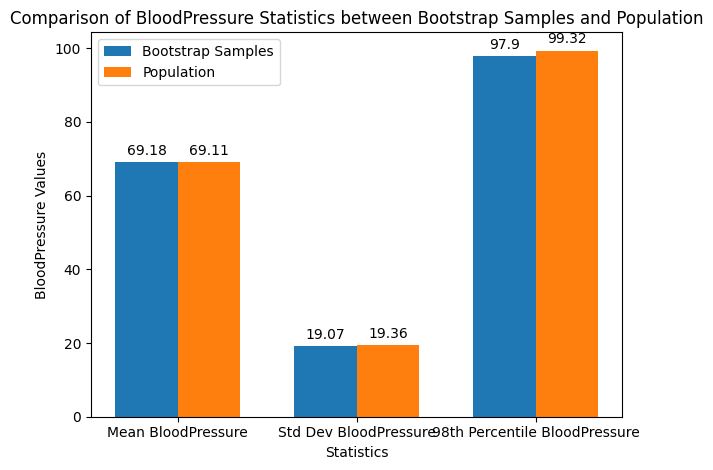

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Data for plotting
categories = ['Mean BloodPressure', 'Std Dev BloodPressure', '98th Percentile BloodPressure']
# The values for each category based on bootstrap samples
bootstrap_values = [avg_mean_bp, avg_std_bp, avg_percentile_98_bp]
# The values for each category based on the population data
population_values = [population_mean_bp, population_std_bp, population_percentile_98_bp]

x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

# Plotting the comparison bar charts
fig, ax = plt.subplots()
# Plotting the bars for bootstrap samples
bars1 = ax.bar(x - width/2, bootstrap_values, width, label='Bootstrap Samples')
# Plotting the bars for the population data
bars2 = ax.bar(x + width/2, population_values, width, label='Population')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Statistics')
ax.set_ylabel('BloodPressure Values')
ax.set_title('Comparison of BloodPressure Statistics between Bootstrap Samples and Population')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Function to add value labels on the bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Adding value labels to both sets of bars
add_value_labels(bars1)
add_value_labels(bars2)

fig.tight_layout()  # Adjust layout to make room for labels

plt.show()  # Display the plot



## **Line Plot**

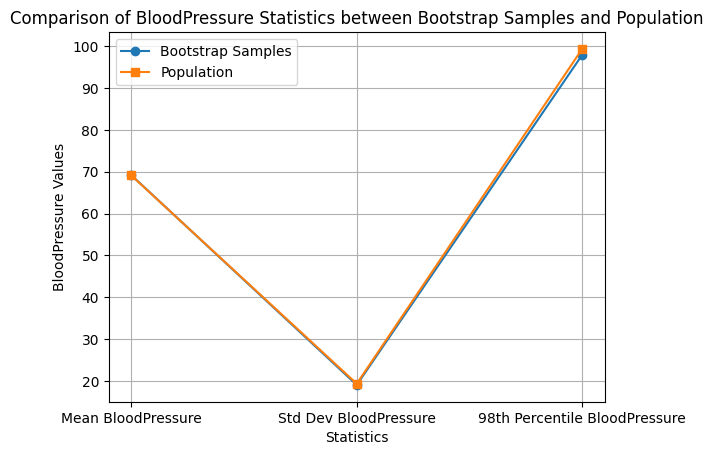

In [8]:
#Line Plot
fig, ax = plt.subplots()
ax.plot(categories, bootstrap_values, marker='o', label='Bootstrap Samples')
ax.plot(categories, population_values, marker='s', label='Population')

ax.set_xlabel('Statistics')
ax.set_ylabel('BloodPressure Values')
ax.set_title('Comparison of BloodPressure Statistics between Bootstrap Samples and Population')
ax.legend()
plt.grid(True)
plt.show()


* Overlapping indicates bothe are similar.

* But for the 98th poercentile, we can see the slight variation in both the lines indicating a slight difference between both